In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import duckdb
from matplotlib.ticker import FuncFormatter

df = pd.read_csv("data/Norway_new_car_sales_by_month.csv")
df.head()


,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
4,2007,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN


### a)

In [100]:
df["Avg_CO2"].head()

0    152
1    156
2    159
3    160
4    160
Name: Avg_CO2, dtype: int64

### b)

In [72]:
df_yearly_quantity = duckdb.query(
            """
            SELECT year, SUM(quantity) as Quantity
            FROM df
            GROUP BY year
            ORDER BY year
            
    
            """
).df()

df_yearly_quantity = df_yearly_quantity.set_index("Year")
df_yearly_quantity


,Quantity
Year,
2007,129195.0
2008,110617.0
2009,98675.0
2010,127754.0
2011,138345.0
2012,137967.0
2013,142151.0
2014,144202.0
2015,150686.0


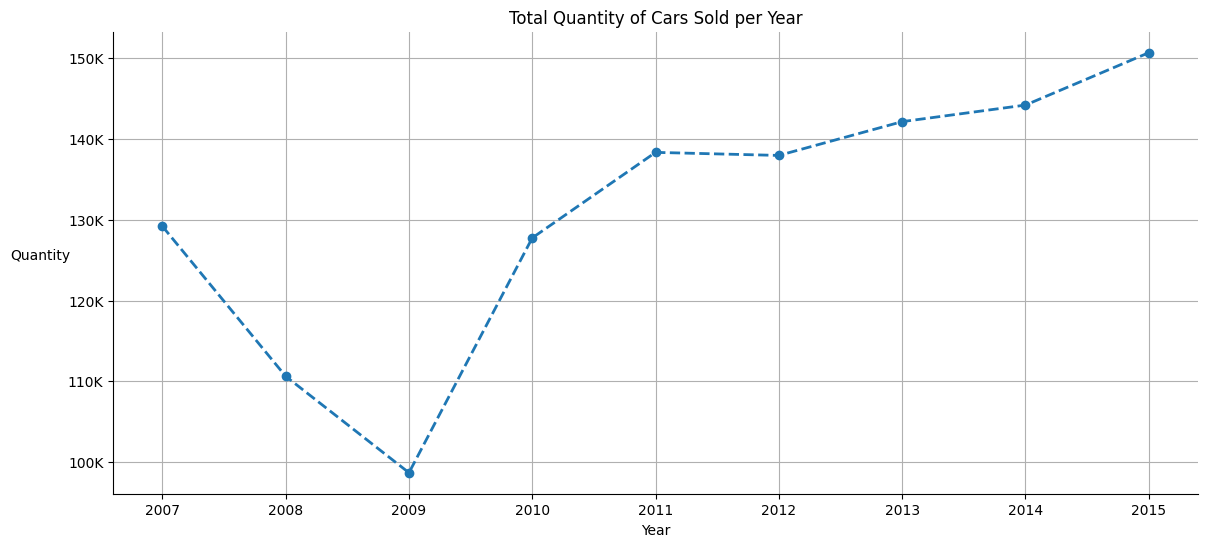

In [109]:
# A function for formatting the quantity according to swedish standard
def custom_formatter(val, pos):
    if val >= 1_000_000:
        return f"{val / 1_000_000:.1f}M".replace(".", ",")
    else:
        return f"{int(val / 1000)}K"

formatter = FuncFormatter(custom_formatter)

# Plotting
ax = df_yearly_quantity.iloc[:9].plot(linewidth=2, style='o--', figsize=(14,6))
ax.set(title="Total Quantity of Cars Sold per Year")
ax.set_ylabel("Quantity", rotation=0, labelpad=20)

# Apply the formatter for y-axis
ax.yaxis.set_major_formatter(formatter)

# Styling
ax.grid(True)
ax.spines[["top", "right"]].set_visible(False)
ax.legend().remove()


### c)

In [89]:
df_yearly_CO2_emission = duckdb.query(
    """
    SELECT
    year, SUM(Avg_Co2) as CO2_emission
    FROM df
    GROUP BY YEAR
    ORDER BY YEAR
    """
).df().set_index("Year")

df_yearly_CO2_emission



,CO2_emission
Year,
2007,1908.0
2008,1896.0
2009,1811.0
2010,1688.0
2011,1608.0
2012,1559.0
2013,1476.0
2014,1325.0
2015,1197.0


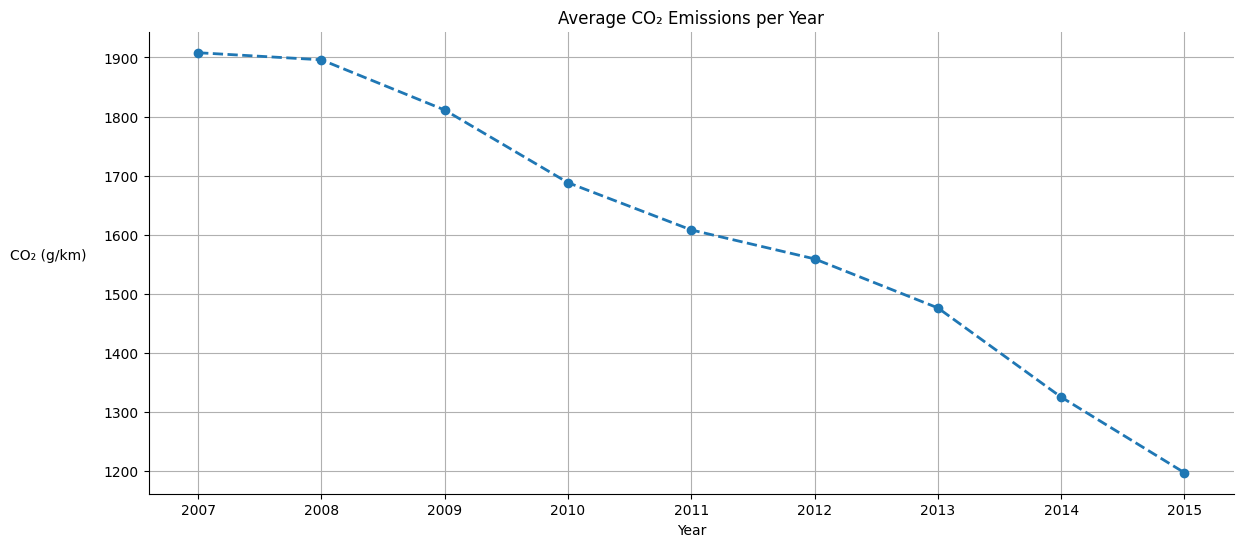

In [108]:
ax = df_yearly_CO2_emission.iloc[:9].plot(linewidth =2, style = "--o", figsize=(14,6))
ax.set(title="Average CO₂ Emissions per Year")
ax.set_ylabel('CO₂ (g/km)', rotation=0, labelpad= 40)



ax.spines[["top", "right"]].set_visible(False)
ax.grid(True)
ax.legend().remove()

### d)